In [370]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.plotly as py
import math
from IPython.display import Image
import pandas as pd
import pylab as pl
import numpy as np
import json
import ggplot
import googlemaps
import seaborn as sns
import re
import time
import cython
from gensim.models import doc2vec
import nltk
import re

# Getting Lat and Long of Factories
a = list(df.index)

gmaps = googlemaps.Client(key='AIza_____________________YxLg')
result = []
i=0
while i<=81:
    if i % 10 == 0:
        print "working"
    result.append(gmaps.geocode(a[i]))
    i=i+1
    
print len(result)

In [367]:
Stem_A = pd.read_csv("Atlabs_LLc.csv")
Stem_A = Stem_A.drop('Unnamed: 0',1)
Stem_A.head()

,Age Group,Lattitude,Longitude,Product Brand,ORDER.ID,Product.Name,Price...AED..,Description
0,9.0,31.170362,120.661995,XYZ,3DXYZCP2ADV,3D Printer Advance Classroom pack,32000,This classroom pack consist of \r\n10 No of Da...
1,9.0,31.170362,120.661995,XYZ,3DXYZCP1,3D Printer Classroom pack,23600,This classroom pack consist of: \r\n9 No of Da...
2,6.0,55.732771,9.119231,LEGOEducation,45110,BuildToExpress Core Set,213,The set includes over 200 LEGO elements in a s...
3,6.0,55.732771,9.119231,LEGOEducation,2045110,BuildToExpress Guide & Activity Pack,581,Contains practical guidance on introducing and...
4,10.0,31.170360,120.662000,XYZ,3FM1XXAE00K,da Vinci Minimaker,1500,*Printers would be available in 4 - 6 weeks*\r...


In [353]:
import plotly.plotly as py
import pandas as pd

df_ats = pd.read_csv('Atlabs_LLc.csv')
df_ats.head()

df_fs = pd.read_csv('Atlabs_LLc.csv')
df_fs.head()

ats = [ dict(
        type = 'scattergeo',
        locationmode = 'World',
        lon = df_ats['Longitude'],
        lat = df_ats['Lattitude'],
        hoverinfo = 'text',
        text = df_ats['Product Brand'],
        mode = 'markers',
        marker = dict( 
            size=10, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        


fig = ats
py.iplot( fig )

In [354]:
Stem_A.head()

,Age Group,Lattitude,Longitude,Product Brand,ORDER.ID,Product.Name,Price...AED..,Description
0,9.0,31.170362,120.661995,XYZ,3DXYZCP2ADV,3D Printer Advance Classroom pack,32000,This classroom pack consist of \r\n10 No of Da...
1,9.0,31.170362,120.661995,XYZ,3DXYZCP1,3D Printer Classroom pack,23600,This classroom pack consist of: \r\n9 No of Da...
2,6.0,55.732771,9.119231,LEGOEducation,45110,BuildToExpress Core Set,213,The set includes over 200 LEGO elements in a s...
3,6.0,55.732771,9.119231,LEGOEducation,2045110,BuildToExpress Guide & Activity Pack,581,Contains practical guidance on introducing and...
4,10.0,31.170360,120.662000,XYZ,3FM1XXAE00K,da Vinci Minimaker,1500,*Printers would be available in 4 - 6 weeks*\r...


# Type of Products ATLAB buy from Each Brand 

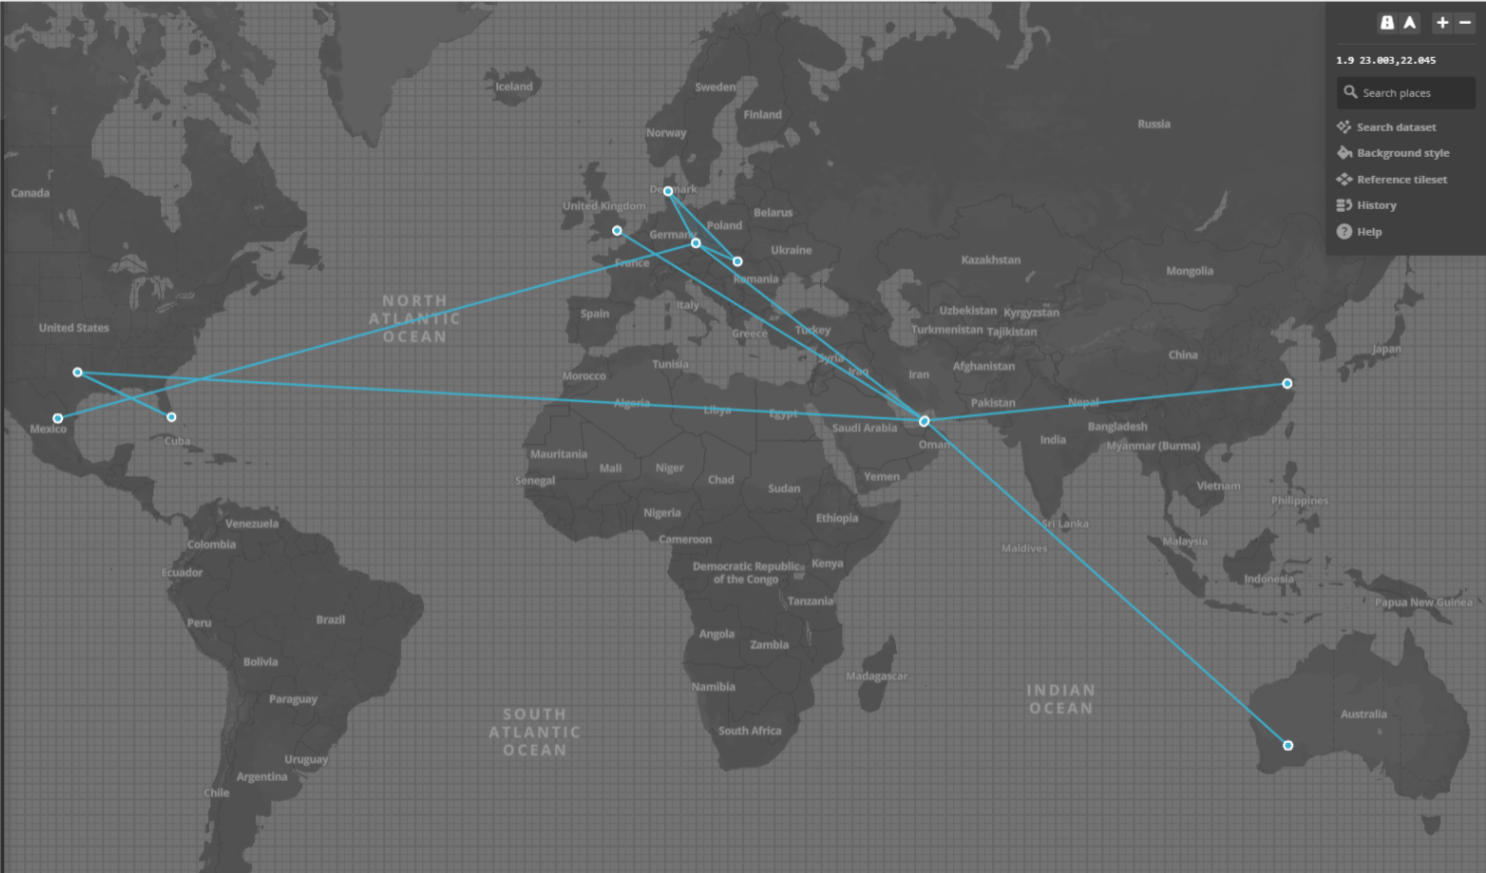

In [140]:
Image(filename='imgs/Sketch.png')

In [355]:
no_product = lambda x: sum(Stem_A['Product Brand']==x)

In [356]:
Sum_Products = []
for i in Stem_A['Product Brand']:
    Sum_Products.append(no_product(i)) 

# ATLAB's Products

In [362]:
df1 = Stem_A.drop(['Longitude','Lattitude','ORDER.ID','Description'],1)


In [363]:
df1 = df1.set_index('Product.Name')

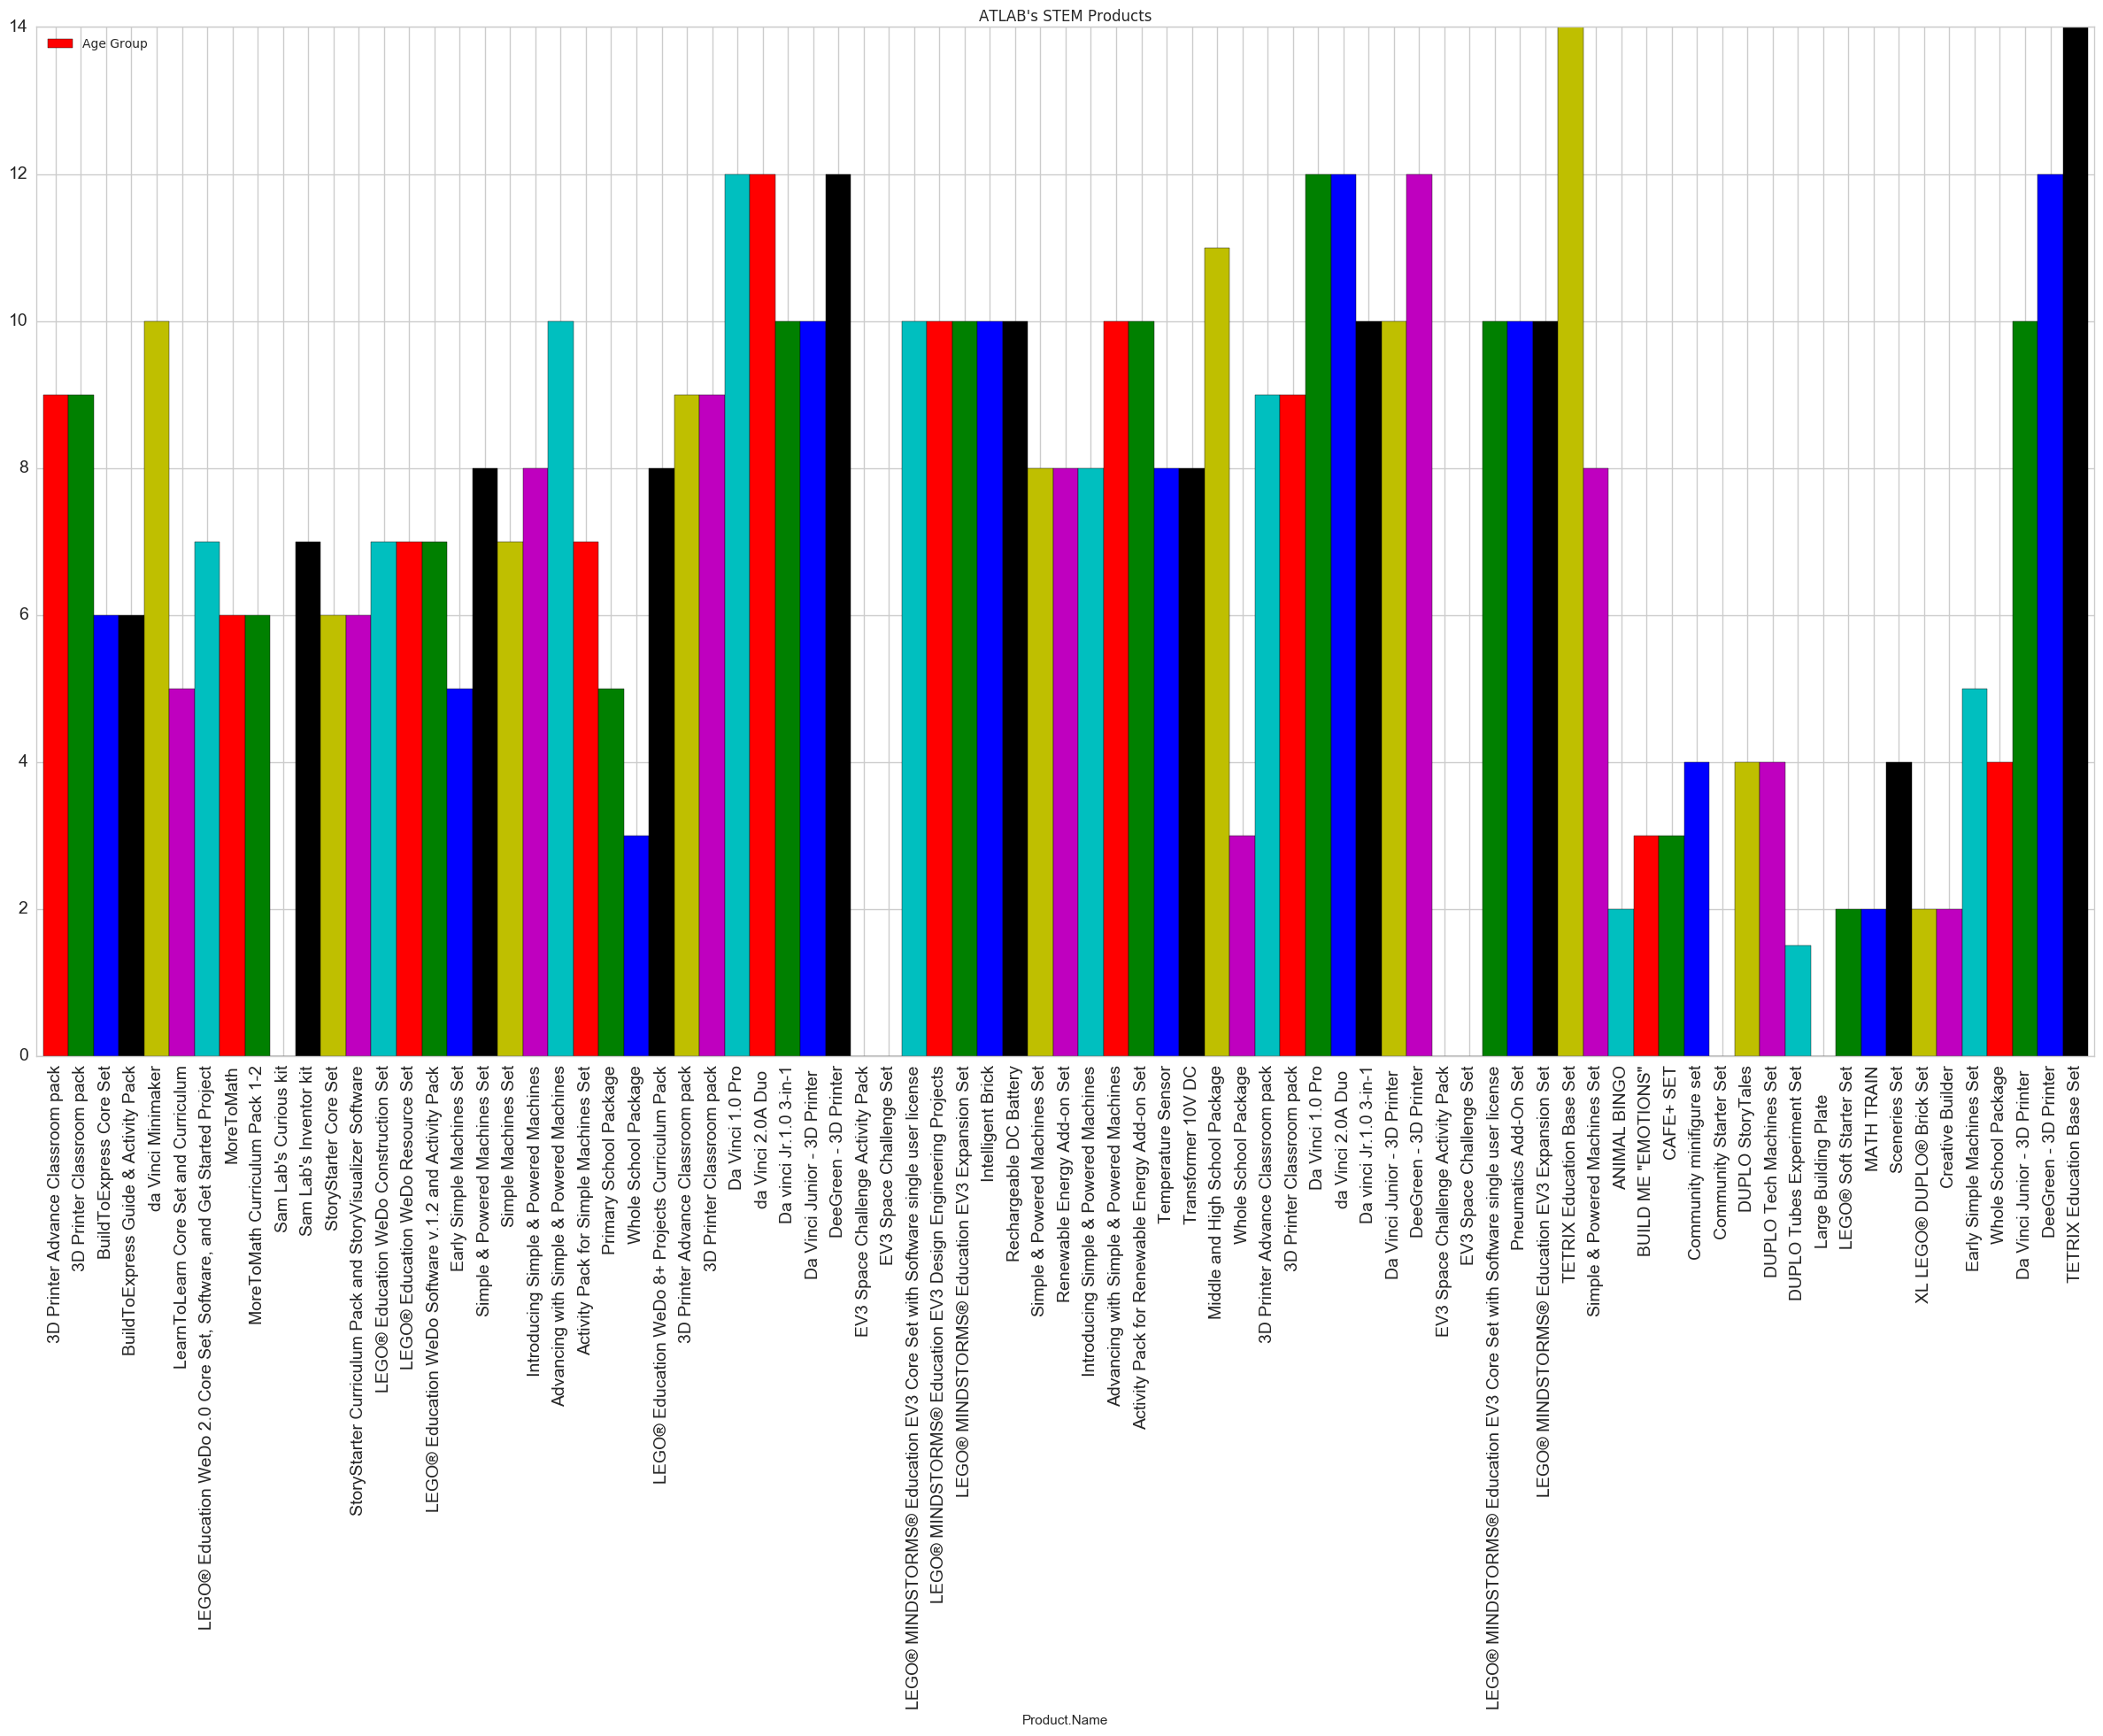

In [366]:
df=df1['Age Group']
my_colors = 'rgbkymc'
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
df.plot.bar(legend=True,figsize=(30,15),width=1,fontsize=14,stacked=True,color=my_colors,title="ATLAB's STEM Products")


# For Every 100 Product Purchased

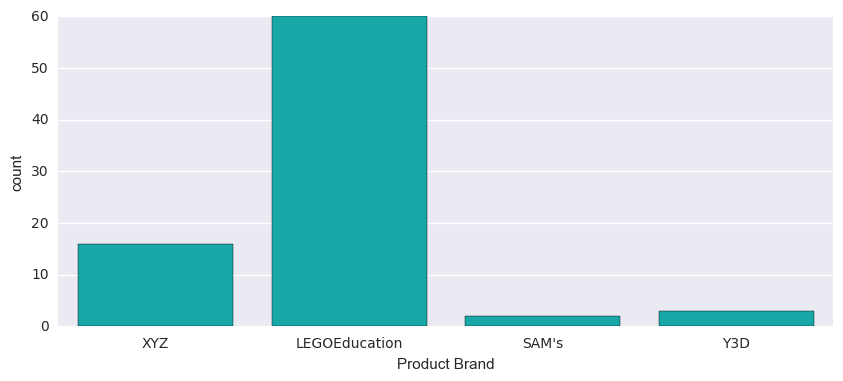

In [205]:
f, ax = plt.subplots(figsize=(10, 4),)
sns.countplot(Stem_A['Product Brand'],color='c')

# Spread of Spending 

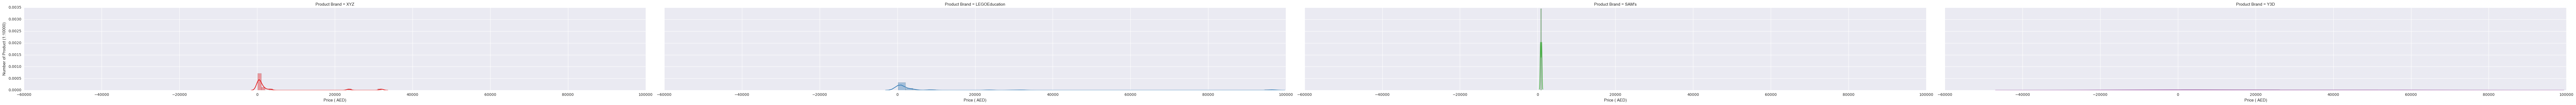

In [207]:
BrandGrid = sns.FacetGrid(Stem_A, col='Product Brand',hue='Product Brand',margin_titles=True,palette="Set1",size=4, aspect=6,)
BrandGrid.map(sns.distplot,'Price...AED..');
BrandGrid.set_axis_labels("Price ( AED)", "Number of Product (1:10000)")


# Overall Spending 

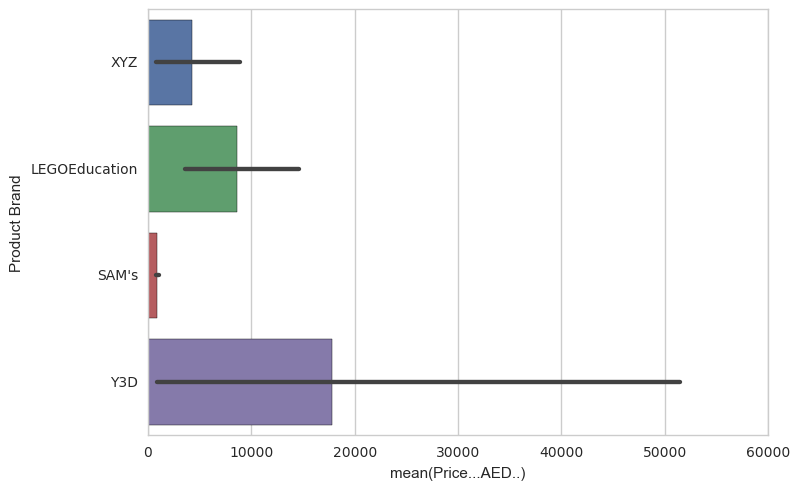

In [209]:
sns.set(style = 'whitegrid')
sns.barplot(x = 'Price...AED..', y = 'Product Brand', data = Stem_A)

# Total Spending Over Set Of 100 Products = AED 639000 == Dollar 174,200

In [334]:
Total_spending = sum(Stem_A['Price...AED..'])
Total_spending

639007.0

# Comparison Of Supplier to ATLAB'S Sale

In [408]:
sam_lab = pd.read_csv("SAM_LAB.csv")

In [410]:
sam_lab = sam_lab.drop(['Unnamed: 0'],1)

In [411]:
price = Stem_A['Price...AED..']/3.67 

In [414]:
compare = [price,sam_lab['Price ( USD )'],Lego_edu['Price (USD)']]

In [415]:
comapare=pd.DataFrame(compare)

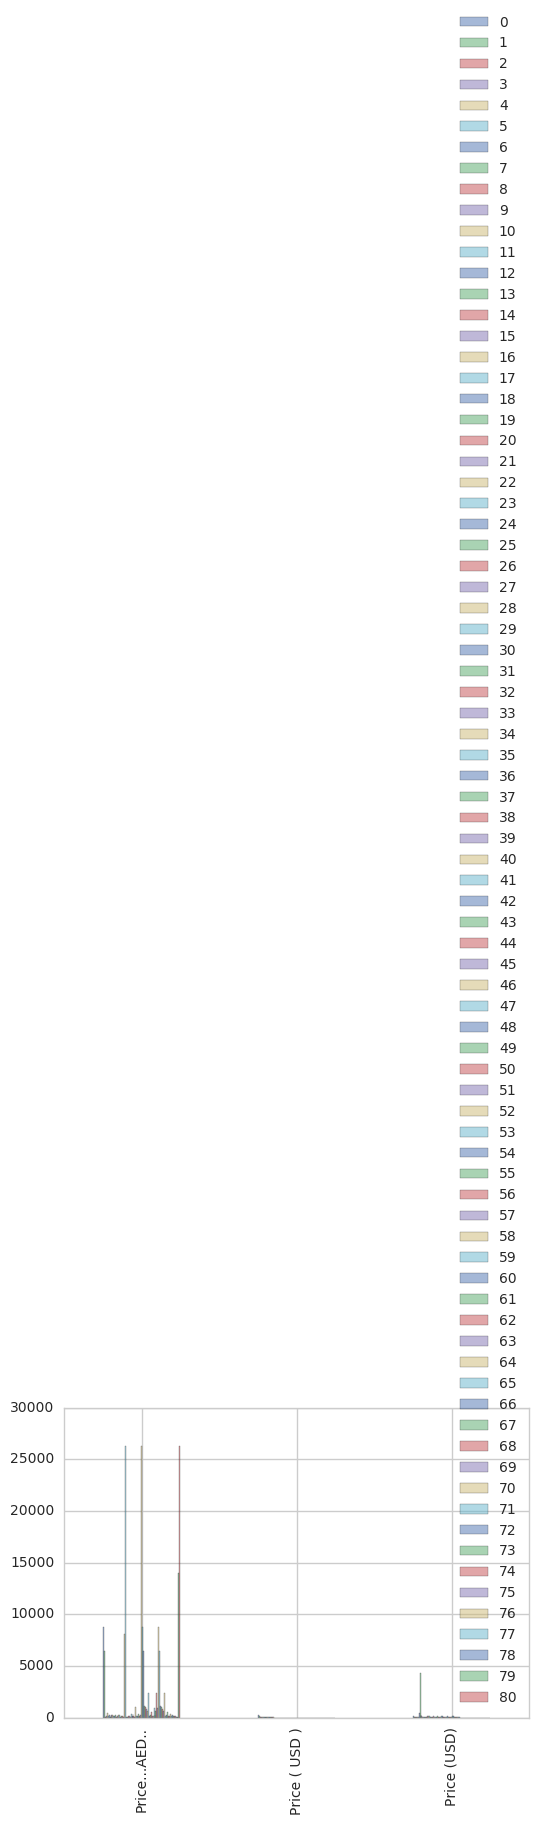

In [418]:
comapare.plot(alpha = 0.5, kind='bar')

# Popular Products in Competetion 

In [374]:
Lego_edu = pd.read_csv("Lego_Education.csv")

In [378]:
Lego_edu = Lego_edu.drop(['Unnamed: 0'],1)

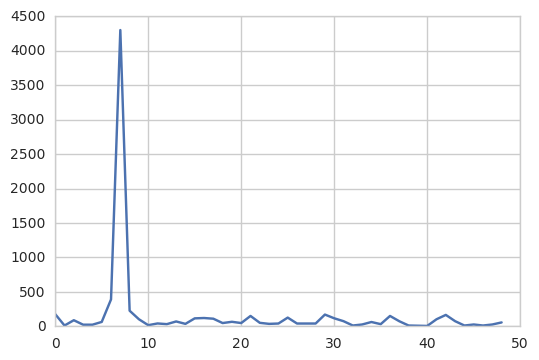

In [388]:
plot(Lego_edu['Price (USD)'])

# Sentiment Analysis for EV3 Product 

In [ ]:

def seperate_words(sentence):
    return re.split('\W+', sentence)
class MyDocs(object):
    def __iter__(self):
        for i, text in enumerate(open("first.txt")):
            yield doc2vec.LabeledSentence(words=seperate_words(text), tags=['%s' % i])

mydocs = MyDocs() 
model = doc2vec.Doc2Vec(mydocs, size = 200, window = 8, min_count = 5, workers = 4) 
model.save('first.model')

model = doc2vec.Doc2Vec.load('first.model') 
print model.most_similar(positive=["EV3","LEGO"], negative=["not"], topn=3) 

# [('MINDSTORMS', 0.9999223947525024), ('Edition', 0.9998977184295654), ('the', 0.9998908042907715)]




# Cosine Analysis

In [390]:
def cossim(v1, v2):
    return np.dot(v1, v2) / np.sqrt(np.dot(v1, v1)) / np.sqrt(np.dot(v2, v2))
def get_line(filename, n):
    with open(filename) as f:
        for i, e in enumerate(f):
            if i == n:
                return e
input_text = "good breakfast, clean bathroom"
input_vec = model.infer_vector(seperate_words(input_text)) 

In [400]:
cossims_with_input = map(lambda v: cossim(input_vec, v), model.docvecs)

In [401]:
def argmaxn(l, n):
    l_copy = list(l)
    args = []
    for i in range(n):
        arg = np.argmax(l_copy)
        args.append(arg)
        l_copy[arg] = -float('inf')
        return args 

In [ ]:
sim_ids = argmaxn(cossims_with_input, 3)
for i in range(3):
    print "(Review-%s, Similarity:%.4f):" % (sim_ids[i] + 1, cossims_with_input[sim_ids[i]]),
    get_line('first.txt', sim_ids[i])

# (Review-76, Similarity:0.9892):